## Mini Project for Bioinformatics Track: 

The genetic code of all living organisms are represented by a long sequence of simple molecules called nucleotides, or bases, which makes up the Deoxyribonucleic acid, better known as DNA. There are only four such nucleotides, and the entire genetic code of a human can be seen as a simple, though 3 billion long, string of the letters A, C, G, and T. Analyzing DNA data to gain increased biological understanding is much about searching in (long) strings for certain string patterns involving the letters A, C, G, and T. This is an integral part of bioinformatics, a scientific discipline addressing the use of computers to search for, explore, and use information about genes, nucleic acids, and proteins.

** FASTQ ** format is a text-based format for storing both a biological sequence (usually nucleotide sequence) and its corresponding quality scores. Both the sequence letter and quality score are each encoded with a single ASCII character for brevity.

A FASTQ file normally uses four lines per sequence.
* Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
* Line 2 is the raw sequence letters.
* Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
* Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

In [10]:
!head -4 DNA.fastq

@HWI-M20149:202:000000000-AF422:1:1101:16309:1827 2:N:0:CAAATTCGGGAT
CCTGTTTGCTCCCCTCGCTTTCGTACCTCAGCGTCCATTCTTGTCCAGTCAGTCGCCTTCGCCACTGGTGTTCTTCCGTATATCTACGACTTTCACCTCTACACTCGGAATTCCACTCTCCTCTCCTATCTTCTAGCTATCTCGTTTCAATGGCTGTTCTGGCGTTGAGCTCCTGGCTTTCCCCTCTGACTTGATTATCCTCCTACGTACTCTTTACGCCCACTCCTTCCTATTCTCGCTTGCTTCCTCCT
+
AAA1>FD1BFFFGG1A1EFGGGEB00AGF111AAA0/D222A1DB121D111B1AA/AEH/EE//AB>F0BEH@F2@/10B1BFG21///?EGF2F1FGH1B10>0////?FE121>01BBBGGF011211BF>221>22<120?<?F22221<0/?<1<111/?<-.1<<1<110<<CCG00C<.<0=GGD<00:000;0:/::::.0:::0BF####################################


## Steps to complete the project: 
<font color=blue>
*  ### Read sequence from a file (DNA.fastq)
* ### Create a list or an array for sequence data 
* ### Calcuate counts for each necleotide (A, C, G, T)
* ### Plot necleotide base frequency 

In [8]:
import numpy as np

### Extract sequence from file

In [ ]:
seq_list = []
with open('DNA.fastq','r') as f:
    content=f.readlines()

for i, line in enumerate(content):
    if i % 4 == 1:
        seq_list.append(line)
            #print(i, line) 
print(seq_list)     
       

In [13]:
seq_array = np.array(seq_list).reshape(-1,1)

In [ ]:
print(seq_array)
print(seq_array.ndim, seq_array.size)

### Count nucleotides 

In [15]:
def count(dna, base):
    m = []   # matches for base in dna: m[i]=True if dna[i]==base
    for c in dna:
        m.append(c == base)
    return sum(m)


In [16]:
count(seq_array[0,0], 'G')
count(seq_list, 'G')

0

In [17]:
def freq_lists(dna_list):
    n = len(dna_list[0])
    A = [0]*n
    T = [0]*n
    G = [0]*n
    C = [0]*n
    for dna in dna_list:
        for index, base in enumerate(dna):
            if base == 'A':
                A[index] += 1
            elif base == 'C':
                C[index] += 1
            elif base == 'G':
                G[index] += 1
            elif base == 'T':
                T[index] += 1
    return A, C, G, T

In [18]:
freq_lists(seq_array[0,0])

([30], [92], [36], [93])

In [19]:
def freq_dict_of_list(dna_list):
    #frequency_matrix = {'A':0, 'C':0, 'G':0, 'T':0 }
    frequency_matrix = {base: 0 for base in 'ACGT'}
    for dna in dna_list:
         for index, base in enumerate(dna):  
            if not base in '\n':
                frequency_matrix[base] = frequency_matrix[base]+1
    return frequency_matrix

In [20]:
matrix = freq_dict_of_list(seq_list)
print(matrix)

{'A': 405, 'C': 830, 'G': 313, 'T': 962}


In [26]:
def freq_dict_of_arrays(dna_array):
    #frequency_matrix = {'A':0, 'C':0, 'G':0, 'T':0 }
    frequency_matrix = {base: 0 for base in 'ACGT'}
    for i in range(dna_array.size):
        dna=dna_array[i,0]
        for index, base in enumerate(dna):  
            if not base in '\n':
                frequency_matrix[base] = frequency_matrix[base]+1
    return frequency_matrix

In [27]:
seq_count=freq_dict_of_arrays(seq_array)
print(seq_count)

{'A': 405, 'C': 830, 'G': 313, 'T': 962}


### Calculate Nuclotides A, C, G, T frequence

In [23]:
# list of A,C, G, T count from dic seq_count
values = seq_count.values()
seq_sum = sum(values)
#= seq_count[base for base in 'ACGT']
print(seq_sum)
seq_feq = [x/seq_sum for x in values]
print(seq_feq)

2510
[0.16135458167330677, 0.33067729083665337, 0.12470119521912351, 0.38326693227091635]


### Plotting Nuclotides Frequency 

In [24]:
import matplotlib.pyplot as plt

In [25]:
x=['A', 'C', 'G', 'T']
y= np.array(seq_feq)


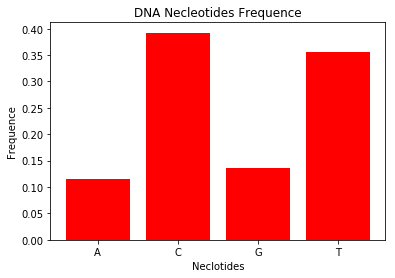

In [452]:
plt.bar(x, y, color='red')
plt.title("DNA Necleotides Frequence")
plt.xlabel('Neclotides')
plt.ylabel('Frequence')
plt.show()